# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_04ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,ixterm-00001-00002,"['--disable-ansi-color', '--disable-16-color',...",11.1115,3239240
1,1,ixterm-00001-00003,"['--disable-active-icon', '--disable-direct-co...",10.2715,3020352
2,2,ixterm-00001-00004,"['--disable-16-color', '--disable-256-color', ...",8.7345,2676232
3,3,ixterm-00001-00005,"['--disable-ansi-color', '--disable-16-color',...",10.1130,2951672
4,4,ixterm-00001-00006,"['--disable-active-icon', '--disable-16-color'...",10.3190,2978064
...,...,...,...,...,...
375,375,ixterm-00020-00015,"['--disable-ansi-color', '--disable-88-color',...",11.3125,3284152
376,376,ixterm-00020-00016,"['--disable-ansi-color', '--disable-88-color',...",9.7600,2735152
377,377,ixterm-00020-00017,"['--disable-16-color', '--disable-256-color', ...",7.5115,2407800
378,378,ixterm-00020-00018,"['--disable-16-color', '--disable-direct-color...",11.7455,3385544


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,ixterm-00001-00002,"['--disable-ansi-color', '--disable-16-color',...",11.1115,3239240,ixterm,00001,00002
1,1,ixterm-00001-00003,"['--disable-active-icon', '--disable-direct-co...",10.2715,3020352,ixterm,00001,00003
2,2,ixterm-00001-00004,"['--disable-16-color', '--disable-256-color', ...",8.7345,2676232,ixterm,00001,00004
3,3,ixterm-00001-00005,"['--disable-ansi-color', '--disable-16-color',...",10.1130,2951672,ixterm,00001,00005
4,4,ixterm-00001-00006,"['--disable-active-icon', '--disable-16-color'...",10.3190,2978064,ixterm,00001,00006
...,...,...,...,...,...,...,...,...
375,375,ixterm-00020-00015,"['--disable-ansi-color', '--disable-88-color',...",11.3125,3284152,ixterm,00020,00015
376,376,ixterm-00020-00016,"['--disable-ansi-color', '--disable-88-color',...",9.7600,2735152,ixterm,00020,00016
377,377,ixterm-00020-00017,"['--disable-16-color', '--disable-256-color', ...",7.5115,2407800,ixterm,00020,00017
378,378,ixterm-00020-00018,"['--disable-16-color', '--disable-direct-color...",11.7455,3385544,ixterm,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  11.1900  11.1810  11.2520  11.1945  11.2100  11.2515   
00002    11.1115      NaN  11.1780  11.1325  11.1660  11.2115  11.3790   
00003    10.2715  10.2415      NaN  10.4765  10.2680  10.2490  10.2865   
00004     8.7345   8.6970   8.7390      NaN   8.6905   8.7355   8.7065   
00005    10.1130  10.0575  10.0470  10.1000      NaN  10.1180  10.0860   
00006    10.3190  10.0560  10.0925  10.1115  10.0935      NaN  10.1010   
00007     8.9585   8.9435   8.9625   8.9440   8.9370   9.0290      NaN   
00008     8.2380   8.2070   8.1900   8.1960   8.1990   8.2355   8.1890   
00009    12.6125  12.5740  12.5900  12.6330  12.6365  12.6180  12.6395   
00010    10.6915  10.6795  10.7095  10.7350  10.7135  10.6955  10.6905   
00011    10.3185  10.3215  10.3355  10.3550  10.3445  10.4015  10.3205   
00012    10.7235  10.6585  10.6600  10.6960  10.7010  10.6645  10.6250   
00013     8.3760   8.3865   8.3850   8.4125   8.4135   8.3760   8.4155   
00014    11.6095  11.6990  11.5345  11.5885  11.5560  11.6035  11.6230   
00015    11.2725  11.1210  11.1640  11.1785  11.1030  11.1655  11.1510   
00016     9.6835   9.6830   9.6705   9.7410   9.7160   9.7310   9.6895   
00017     7.4485   7.4460   7.4360   7.4345   7.3990   7.4370   7.4220   
00018    11.6035  11.5820  11.8210  11.5965  11.6095  11.5940  11.7335   
00019    10.4395  10.4095  10.4490  10.4745  10.4325  10.4480  10.5170   
00020     8.2635   8.2755   8.2775   8.3395   8.2420   8.3160   8.2950   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  11.2650  11.2370  11.2610  11.2710  11.3100  11.2410  11.3745  11.3340   
00002  11.1640  11.1205  11.1270  11.1855  11.1945  11.1550  11.2955  11.2265   
00003  10.2645  10.2660  10.3005  10.2650  10.2760  10.2690  10.3795  10.3795   
00004   8.7725   8.7385   8.7125   8.7090   8.7475   8.7065   8.6985   8.8900   
00005  10.1510  10.1085  10.0860  10.1535  10.0830  10.1170  10.0835  10.1860   
00006  10.1605  10.3285  10.1475  10.1070  10.1725  10.3120  10.1105  10.1775   
00007   8.9935   8.9325   8.9260   8.9830   8.9270   8.9795   9.1785   9.0525   
00008      NaN   8.2210   8.1710   8.2035   8.2325   8.2115   8.8130   8.2720   
00009  12.6860      NaN  12.6665  12.8465  12.6710  12.6430  13.2000  12.7455   
00010  10.7675  10.7705      NaN  10.7190  10.7700  10.7185  10.6900  10.7410   
00011  10.3775  10.3095  10.3645      NaN  10.3650  10.3490  10.5130  10.4590   
00012  10.7060  10.6720  10.6275  10.6500      NaN  10.6890  10.7550  10.8135   
00013   8.4460   8.4200   8.3760   8.4010   8.4160      NaN   8.4990   8.4470   
00014  11.6600  11.6420  11.5895  11.6240  11.6055  11.6090      NaN  11.6580   
00015  11.1755  11.1065  11.1470  11.1175  11.1740  11.1635  11.1360      NaN   
00016   9.6995   9.6890   9.7160   9.7405   9.7220   9.6830   9.7740   9.8325   
00017   7.4935   7.4365   7.4660   7.4450   7.4825   7.4700   8.2170   7.4960   
00018  11.6130  11.5995  11.6045  11.6445  11.6385  11.6285  11.8975  11.7260   
00019  10.5450  10.4860  10.4905  10.6055  10.5050  10.4795  10.6675  10.5480   
00020   8.3230   8.2740   8.2985   8.2915   8.3510   8.2530   8.2770   8.3545   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  11.3280  11.6375  11.3215  11.3030  11.3350  
00002  11.2965  11.2625  11.2870  11.3220  11.2770  
00003  10.3690  10.4060  10.4315  10.5590  10.4130  
00004   8.8545   8.8070   8.7700   8.7965   8.8195  
00005  10.1615  10.2065  10.1995  10.2415  10.2190  
00006  10.2390 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00003)"
00002,"(Build Time, 00001)"
00003,"(Build Time, 00002)"
00004,"(Build Time, 00005)"
00005,"(Build Time, 00003)"
00006,"(Build Time, 00002)"
00007,"(Build Time, 00010)"
00008,"(Build Time, 00010)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  3255944.0  3255944.0  3255944.0  3255944.0  3255944.0   
00002   3239240.0        NaN  3239240.0  3239240.0  3239240.0  3239240.0   
00003   3020352.0  3020352.0        NaN  3020352.0  3020352.0  3020352.0   
00004   2676232.0  2676232.0  2676232.0        NaN  2676232.0  2676232.0   
00005   2951672.0  2951672.0  2951672.0  2951672.0        NaN  2951672.0   
00006   2978064.0  2978064.0  2978064.0  2978064.0  2978064.0        NaN   
00007   2644256.0  2644256.0  2644256.0  2644256.0  2644256.0  2644256.0   
00008   2620824.0  2620824.0  2620824.0  2620824.0  2620824.0  2620824.0   
00009   3539272.0  3539272.0  3539272.0  3539272.0  3539272.0  3539272.0   
00010   3051592.0  3051592.0  3051592.0  3051592.0  3051592.0  3051592.0   
00011   2934360.0  2934360.0  2934360.0  2934360.0  2934360.0  2934360.0   
00012   3189624.0  3189624.0  3189624.0  3189624.0  3189624.0  3189624.0   
00013   2562776.0  2562776.0  2562776.0  2562776.0  2562776.0  2562776.0   
00014   3362936.0  3362936.0  3362936.0  3362936.0  3362936.0  3362936.0   
00015   3284152.0  3284152.0  3284152.0  3284152.0  3284152.0  3284152.0   
00016   2735152.0  2735152.0  2735152.0  2735152.0  2735152.0  2735152.0   
00017   2407800.0  2407800.0  2407800.0  2407800.0  2407800.0  2407800.0   
00018   3385544.0  3385544.0  3385544.0  3385544.0  3385544.0  3385544.0   
00019   2878640.0  2878640.0  2878640.0  2878640.0  2878640.0  2878640.0   
00020   2633736.0  2633736.0  2633736.0  2633736.0  2633736.0  2633736.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  3255944.0  3255944.0  3255944.0  3255944.0  3255944.0  3255944.0   
00002  3239240.0  3239240.0  3239240.0  3239240.0  3239240.0  3239240.0   
00003  3020352.0  3020352.0  3020352.0  3020352.0  3020352.0  3020352.0   
00004  2676232.0  2676232.0  2676232.0  2676232.0  2676232.0  2676232.0   
00005  2951672.0  2951672.0  2951672.0  2951672.0  2951672.0  2951672.0   
00006  2978064.0  2978064.0  2978064.0  2978064.0  2978064.0  2978064.0   
00007        NaN  2644256.0  2644256.0  2644256.0  2644256.0  2644256.0   
00008  2620824.0        NaN  2620824.0  2620824.0  2620824.0  2620824.0   
00009  3539272.0  3539272.0        NaN  3539272.0  3539272.0  3539272.0   
00010  3051592.0  3051592.0  3051592.0        NaN  3051592.0  3051592.0   
00011  2934360.0  2934360.0  2934360.0  2934360.0        NaN  2934360.0   
00012  3189624.0  3189624.0  3189624.0  3189624.0  3189624.0        NaN   
00013  2562776.0  2562776.0  2562776.0  2562776.0  2562776.0  2562776.0   
00014  3362936.0  3362936.0  3362936.0  3362936.0  3362936.0  3362936.0   
00015  3284152.0  3284152.0  3284152.0  3284152.0  3284152.0  3284152.0   
00016  2735152.0  2735152.0  2735152.0  2735152.0  2735152.0  2735152.0   
00017  2407800.0  2407800.0  2407800.0  2407800.0  2407800.0  2407800.0   
00018  3385544.0  3385544.0  3385544.0  3385544.0  3385544.0  3385544.0   
00019  2878640.0  2878640.0  2878640.0  2878640.0  2878640.0  2878640.0   
00020  2633736.0  2633736.0  2633736.0  2633736.0  2633736.0  2633736.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  3255944.0  3255944.0  3255944.0  3255944.0  3255944.0  3255944.0   
00002  3239240.0  3239240.0  3239240.0  3239240.0  3239240.0  3239240.0   
00003  3020352.0  3020352.0  3020352.0  3020352.0  3020352.0  3020352.0   
00004  2676232.0  2676232.0  2676232.0  2676232.0  2676232.0  2676232.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,11.6375,11.289342,11.1810
00002,11.3790,11.215368,11.1115
00003,10.5590,10.335342,10.2415
00004,8.8900,8.753974,8.6905
00005,10.2415,10.132526,10.0470
00006,10.3285,10.180289,10.0560
00007,9.1785,9.001079,8.9260
00008,8.8130,8.258395,8.1710


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00009,13.2000,12.712211,12.5740
00018,11.8975,11.678026,11.5820
00014,11.8055,11.640816,11.5345
00001,11.6375,11.289342,11.1810
00002,11.3790,11.215368,11.1115
00015,11.3245,11.187658,11.1030
00010,10.9615,10.760395,10.6795
00012,10.8210,10.715316,10.6250


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

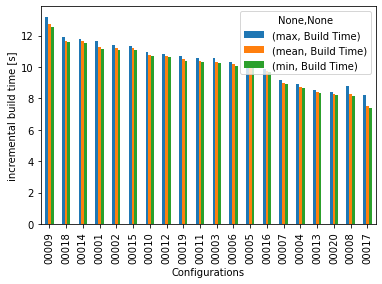

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

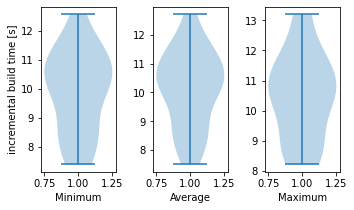

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,11.1900,11.1810,11.2520,11.1945,11.2100,11.2515,11.2650,11.2370,11.2610,11.2710,11.3100,11.2410,11.3745,11.3340,11.3280,11.6375,11.3215,11.3030,11.3350
00002,11.1115,NaN,11.1780,11.1325,11.1660,11.2115,11.3790,11.1640,11.1205,11.1270,11.1855,11.1945,11.1550,11.2955,11.2265,11.2965,11.2625,11.2870,11.3220,11.2770
00003,10.2715,10.2415,NaN,10.4765,10.2680,10.2490,10.2865,10.2645,10.2660,10.3005,10.2650,10.2760,10.2690,10.3795,10.3795,10.3690,10.4060,10.4315,10.5590,10.4130
00004,8.7345,8.6970,8.7390,NaN,8.6905,8.7355,8.7065,8.7725,8.7385,8.7125,8.7090,8.7475,8.7065,8.6985,8.8900,8.8545,8.8070,8.7700,8.7965,8.8195
00005,10.1130,10.0575,10.0470,10.1000,NaN,10.1180,10.0860,10.1510,10.1085,10.0860,10.1535,10.0830,10.1170,10.0835,10.1860,10.1615,10.2065,10.1995,10.2415,10.2190
00006,10.3190,10.0560,10.0925,10.1115,10.0935,NaN,10.1010,10.1605,10.3285,10.1475,10.1070,10.1725,10.3120,10.1105,10.1775,10.2390,10.2285,10.2305,10.1860,10.2520
00007,8.9585,8.9435,8.9625,8.9440,8.9370,9.0290,NaN,8.9935,8.9325,8.9260,8.9830,8.9270,8.9795,9.1785,9.0525,9.0610,9.0580,9.0240,9.0340,9.0965
00008,8.2380,8.2070,8.1900,8.1960,8.1990,8.2355,8.1890,NaN,8.2210,8.1710,8.2035,8.2325,8.2115,8.8130,8.2720,8.2970,8.2915,8.2320,8.2445,8.2655
00009,12.6125,12.5740,12.5900,12.6330,12.6365,12.6180,12.6395,12.6860,NaN,12.6665,12.8465,12.6710,12.6430,13.2000,12.7455,12.7645,12.7075,12.7550,12.7530,12.7900
